In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from  keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Using TensorFlow backend.


In [2]:
np.random.seed(0)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
assert(X_train.shape[0]==y_train.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images is not equal to number of labels"
assert(X_test.shape[1:] == (28,28)), "The dimension of images is not proper"
assert(X_test.shape[1:] == (28,28)), "The dimension of images is not proper"

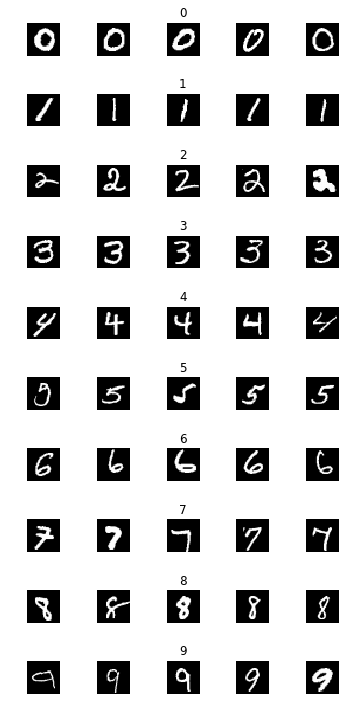

In [6]:
num_of_samples = []
cols =5
num_class = 10
fig, axs =plt.subplots(nrows=num_class, ncols = cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_class):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)), : ,:], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of Images')

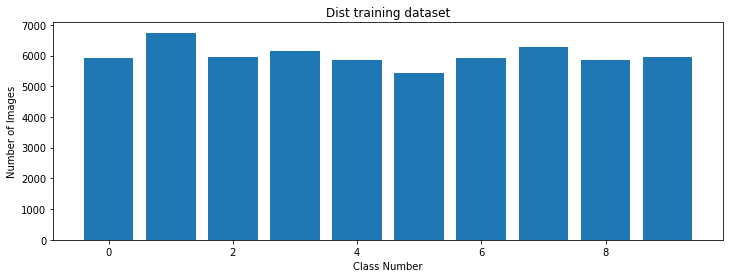

In [7]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0, num_class),num_of_samples)
plt.title("Dist training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")

In [8]:
y_train = to_categorical(y_train, 10)
y_test =to_categorical(y_test, 10)

In [9]:
X_train = X_train/ 255
X_test = X_test / 255

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)




In [11]:
def createmodel():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels,activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_class, activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [12]:
model = createmodel()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=200, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 7s 129us/step - loss: 0.5399 - acc: 0.8309 - val_loss: 0.2671 - val_acc: 0.9245
Epoch 2/10
54000/54000 [==============================] - 6s 104us/step - loss: 0.2965 - acc: 0.9121 - val_loss: 0.2300 - val_acc: 0.9343
Epoch 3/10
54000/54000 [==============================] - 6s 103us/step - loss: 0.2672 - acc: 0.9216 - val_loss: 0.2186 - val_acc: 0.9392
Epoch 4/10
54000/54000 [==============================] - 6s 106us/step - loss: 0.2514 - acc: 0.9260 - val_loss: 0.2128 - val_acc: 0.9383
Epoch 5/10
54000/54000 [==============================] - 6s 104us/step - loss: 0.2404 - acc: 0.9298 - val_loss: 0.2044 - val_acc: 0.9405
Epoch 6/10
54000/54000 [==============================] - 5s 100us/step - loss: 0.2332 - acc: 0.9322 - val_loss: 0.2169 - val_acc: 0.9373
Epoch 7/10
54000/54000 [==============================] - 6s 105us/step - loss: 0.2279 - acc: 0.9321 - val_loss: 0.2111 - v

Text(0.5,0,'epoch')

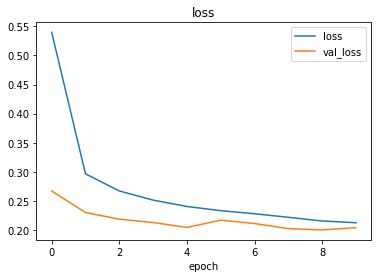

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

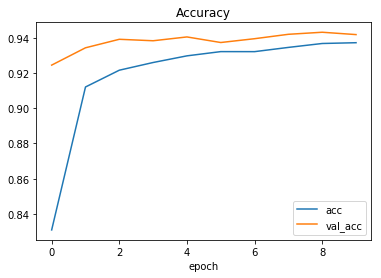

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
print(score[0],score[1])

0.2414642609089613 0.931


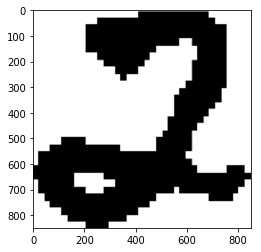

In [17]:
import requests
from PIL import Image
 
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 


In [20]:
import cv2
 


predicted digit: [3]


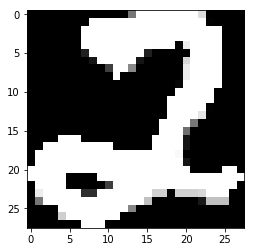

In [21]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1, 784)
 
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))